In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 폰트 관리자
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

# 음수 표현
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]=False

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import LinearSVC

In [9]:
train = pd.read_csv("data/면적별_세대수_구분.csv")
train.head()

test = pd.read_csv("data/면적별_세대수_구분_test.csv")
test.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,C1072,754,아파트,경기도,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0
1,C1128,1354,아파트,경기도,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0
2,C1456,619,아파트,부산광역시,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0
3,C1840,593,아파트,전라북도,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0
4,C1332,1297,아파트,경기도,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0


In [10]:
# 단지코드 제외, 등록차량수 y 설정
train_x = train[train.columns[1:-1]]
train_y = train[train.columns[-1]]

test_x = test[test.columns[1:]]

display(train_x.head())
display(train_y.head())

,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0
1,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0
2,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0
3,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0
4,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0


0     205.0
1    1064.0
2     730.0
3     553.0
4     415.0
Name: 등록차량수, dtype: float64

In [11]:
train_x.info()
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총세대수     411 non-null    int64  
 1   임대건물구분   411 non-null    object 
 2   지역       411 non-null    object 
 3   빈집       411 non-null    float64
 4   노선수      411 non-null    float64
 5   버스       411 non-null    float64
 6   area10   411 non-null    int64  
 7   area20   411 non-null    int64  
 8   area30   411 non-null    int64  
 9   area40   411 non-null    int64  
 10  area50   411 non-null    int64  
 11  area60   411 non-null    int64  
 12  area70   411 non-null    int64  
 13  area80   411 non-null    int64  
 14  area100  411 non-null    int64  
 15  주차면수     411 non-null    float64
dtypes: float64(4), int64(10), object(2)
memory usage: 51.5+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 411 entries, 0 to 410
Series name: 등록차량수
Non-Null Count  Dtype  
--------------  -----  
411 non-nu

In [12]:
le = LabelEncoder()
le.fit(train_x["임대건물구분"])
train_x["임대건물구분"] = le.transform(train_x["임대건물구분"])
test_x["임대건물구분"] = le.transform(test_x["임대건물구분"])

display(train_x.head())
display(test_x.head())

C:\Users\user\AppData\Local\Temp\ipykernel_7936\3723914348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x["임대건물구분"] = le.transform(train_x["임대건물구분"])
C:\Users\user\AppData\Local\Temp\ipykernel_7936\3723914348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x["임대건물구분"] = le.transform(test_x["임대건물구분"])


,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,545,0,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0
1,1216,0,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0
2,755,0,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0
3,696,0,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0
4,566,0,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0


,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,754,0,경기도,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0
1,1354,0,경기도,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0
2,619,0,부산광역시,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0
3,593,0,전라북도,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0
4,1297,0,경기도,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0


In [13]:
a = pd.read_csv("data/age_gender_info.csv")
a["노인청소년"] = a["10대미만(여자)"]+a["10대미만(남자)"]+a["10대(여자)"]+a["10대(남자)"]+a["70대(여자)"]+a["70대(남자)"]+a["80대(여자)"]+a["80대(남자)"]+a["90대(여자)"]+a["90대(남자)"]+a["100대(여자)"]+a["100대(남자)"]

In [33]:
a[["지역","노인청소년"]]

,지역,노인청소년
0,경상북도,0.306899
1,경상남도,0.289602
2,대전광역시,0.283527
3,경기도,0.304165
4,전라북도,0.320675
5,강원도,0.300243
6,광주광역시,0.294664
7,충청남도,0.298290
8,부산광역시,0.323989
9,제주특별자치도,0.321988


In [14]:
### train  지역 - 노인청소년 인구수 비율로 변경
# train_x["지역변수"]=0
train_x.loc[train_x["지역"]=="경상북도","지역변수"] = 0.306899
train_x.loc[train_x["지역"]=="경상남도","지역변수"] = 0.289602
train_x.loc[train_x["지역"]=="대전광역시","지역변수"] = 0.283527
train_x.loc[train_x["지역"]=="경기도","지역변수"] = 0.304165
train_x.loc[train_x["지역"]=="전라북도","지역변수"] = 0.320675
train_x.loc[train_x["지역"]=="강원도","지역변수"] = 0.300243
train_x.loc[train_x["지역"]=="광주광역시","지역변수"] = 0.294664
train_x.loc[train_x["지역"]=="충청남도","지역변수"] = 0.298290
train_x.loc[train_x["지역"]=="부산광역시","지역변수"] = 0.323989
train_x.loc[train_x["지역"]=="제주특별자치도","지역변수"] = 0.321988
train_x.loc[train_x["지역"]=="울산광역시","지역변수"] = 0.296999
train_x.loc[train_x["지역"]=="충청북도","지역변수"] = 0.306738
train_x.loc[train_x["지역"]=="전라남도","지역변수"] = 0.307037
train_x.loc[train_x["지역"]=="대구광역시","지역변수"] = 0.265155
train_x.loc[train_x["지역"]=="서울특별시","지역변수"] = 0.327542
train_x.loc[train_x["지역"]=="세종특별자치시","지역변수"] = 0.255091
train_x.drop("지역", axis=1, inplace=True)
train_x

C:\Users\user\AppData\Local\Temp\ipykernel_7936\3591030819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x.loc[train_x["지역"]=="경상북도","지역변수"] = 0.306899
C:\Users\user\AppData\Local\Temp\ipykernel_7936\3591030819.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x.drop("지역", axis=1, inplace=True)


,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수
0,545,0,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,0.289602
1,1216,0,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,0.283527
2,755,0,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,0.304165
3,696,0,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,0.320675
4,566,0,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,0.320675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,90,0,7.0,0.0,3.0,12,42,36,0,0,0,0,0,0,66.0,0.321988
407,492,0,24.0,0.0,1.0,0,156,156,180,0,0,0,0,0,521.0,0.300243
408,40,0,7.0,1.0,2.0,20,5,15,0,0,0,0,0,0,25.0,0.323989
409,90,0,12.0,0.0,1.0,0,90,0,0,0,0,0,0,0,30.0,0.306738


In [47]:
### test  지역 - 노인청소년 인구수 비율로 변경
# train_x["지역변수"]=0
test_x.loc[test_x["지역"]=="경상북도","지역변수"] = 0.306899
test_x.loc[test_x["지역"]=="경상남도","지역변수"] = 0.289602
test_x.loc[test_x["지역"]=="대전광역시","지역변수"] = 0.283527
test_x.loc[test_x["지역"]=="경기도","지역변수"] = 0.304165
test_x.loc[test_x["지역"]=="전라북도","지역변수"] = 0.320675
test_x.loc[test_x["지역"]=="강원도","지역변수"] = 0.300243
test_x.loc[test_x["지역"]=="광주광역시","지역변수"] = 0.294664
test_x.loc[test_x["지역"]=="충청남도","지역변수"] = 0.298290
test_x.loc[test_x["지역"]=="부산광역시","지역변수"] = 0.323989
test_x.loc[test_x["지역"]=="제주특별자치도","지역변수"] = 0.321988
test_x.loc[test_x["지역"]=="울산광역시","지역변수"] = 0.296999
test_x.loc[test_x["지역"]=="충청북도","지역변수"] = 0.306738
test_x.loc[test_x["지역"]=="전라남도","지역변수"] = 0.307037
test_x.loc[test_x["지역"]=="대구광역시","지역변수"] = 0.265155
test_x.loc[test_x["지역"]=="서울특별시","지역변수"] = 0.327542
test_x.loc[test_x["지역"]=="세종특별자치시","지역변수"] = 0.255091
test_x.drop("지역", axis=1, inplace=True)
test_x

,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수
0,754,0,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0,0.304165
1,1354,0,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0,0.304165
2,619,0,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0,0.323989
3,593,0,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0,0.320675
4,1297,0,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0,0.304165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,349,0,17.0,0.0,4.0,0,112,138,96,0,0,0,0,0,270.0,0.321988
143,596,0,35.0,0.0,1.0,0,180,304,107,0,0,0,0,0,593.0,0.306738
144,120,0,9.0,0.0,1.0,0,66,54,0,0,0,0,0,0,40.0,0.300243
145,675,0,38.0,0.0,1.0,50,314,126,180,0,0,0,0,0,467.0,0.289602


In [49]:
display(train_x.info())
display(test_x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총세대수     411 non-null    int64  
 1   임대건물구분   411 non-null    int32  
 2   빈집       411 non-null    float64
 3   노선수      411 non-null    float64
 4   버스       411 non-null    float64
 5   area10   411 non-null    int64  
 6   area20   411 non-null    int64  
 7   area30   411 non-null    int64  
 8   area40   411 non-null    int64  
 9   area50   411 non-null    int64  
 10  area60   411 non-null    int64  
 11  area70   411 non-null    int64  
 12  area80   411 non-null    int64  
 13  area100  411 non-null    int64  
 14  주차면수     411 non-null    float64
 15  지역변수     411 non-null    float64
dtypes: float64(5), int32(1), int64(10)
memory usage: 49.9 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총세대수     147 non-null    int64  
 1   임대건물구분   147 non-null    int32  
 2   빈집       147 non-null    float64
 3   노선수      147 non-null    float64
 4   버스       147 non-null    float64
 5   area10   147 non-null    int64  
 6   area20   147 non-null    int64  
 7   area30   147 non-null    int64  
 8   area40   147 non-null    int64  
 9   area50   147 non-null    int64  
 10  area60   147 non-null    int64  
 11  area70   147 non-null    int64  
 12  area80   147 non-null    int64  
 13  area100  147 non-null    int64  
 14  주차면수     147 non-null    float64
 15  지역변수     147 non-null    float64
dtypes: float64(5), int32(1), int64(10)
memory usage: 17.9 KB


None

In [50]:
train_x_scale = train_x.copy()
test_x_scale = test_x.copy()
scale = ['총세대수', '빈집', '노선수', '버스', 'area10', 'area20', 'area30',
       'area40', 'area50', 'area60', 'area70', 'area80', 'area100', '주차면수', '지역변수']

scaler = StandardScaler()
for i in scale:
    scaler.fit(train_x_scale[i].values.reshape(-1,1))
    train_x_scale[i] = scaler.transform(train_x_scale[i].values.reshape(-1,1))
    test_x_scale[i] = scaler.transform(test_x_scale[i].values.reshape(-1,1))
    
display(train_x.head())
display(test_x.head())
display(train_x_scale.head())
display(test_x_scale.head())

,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수
0,545,0,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,0.289602
1,1216,0,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,0.283527
2,755,0,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,0.304165
3,696,0,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,0.320675
4,566,0,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,0.320675


,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수
0,754,0,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0,0.304165
1,1354,0,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0,0.304165
2,619,0,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0,0.323989
3,593,0,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0,0.320675
4,1297,0,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0,0.304165


,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수
0,-0.435366,0,0.347522,-0.322966,-0.249910,-0.179522,-0.439933,0.575293,-0.607832,-0.117368,-0.06479,-0.191124,-0.204372,-0.236542,0.117650,-0.826303
1,1.211851,0,-0.040344,2.279760,-0.955841,-0.179522,-0.439933,0.732918,3.040852,-0.148595,-0.06479,-0.191124,-0.204372,-0.236542,1.955075,-1.260748
2,0.080157,0,-0.719109,2.279760,-0.249910,-0.179522,-0.439933,0.037517,-0.930274,1.377634,-0.06479,-0.191124,-0.204372,-0.236542,0.423424,0.215148
3,-0.064681,0,0.056623,-0.322966,-0.602875,-0.179522,-0.439933,0.102421,0.178474,0.327620,-0.06479,-0.191124,-0.204372,-0.236542,0.176025,1.395835
4,-0.383814,0,-0.428209,-0.322966,0.808986,-0.179522,-0.439933,0.181233,0.252013,-0.296924,-0.06479,-0.191124,-0.204372,-0.236542,-0.179785,1.395835


,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수
0,0.077702,0,0.056623,-0.322966,-0.602875,-0.179522,-0.439933,-0.537348,0.551827,0.835061,-0.06479,-0.191124,-0.204372,-0.236542,0.281656,0.215148
1,1.550623,0,-0.428209,-0.322966,-0.249910,-0.179522,-0.439933,0.871998,1.083574,1.623548,-0.06479,-0.191124,-0.204372,-0.236542,1.763272,0.215148
2,-0.253706,0,0.444488,-0.322966,4.338641,-0.179522,-0.439933,0.069969,0.178474,0.054382,-0.06479,-0.191124,-0.204372,-0.236542,-0.096392,1.632831
3,-0.317532,0,-0.622142,-0.322966,-0.249910,-0.179522,-0.439933,0.477937,0.054022,-0.304731,-0.06479,-0.191124,-0.204372,-0.236542,-0.107511,1.395835
4,1.410696,0,-0.234276,-0.322966,-0.602875,-0.179522,-0.439933,0.895178,2.282831,0.554017,-0.06479,-0.191124,-0.204372,-0.236542,1.474176,0.215148


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2)
X_train.head()

,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수
49,451,0,0.0,0.0,4.0,0,298,153,0,0,0,0,0,0,109.0,0.289602
292,368,0,14.0,0.0,2.0,0,0,230,87,51,0,0,0,0,285.0,0.307037
172,712,0,3.0,0.0,2.0,0,0,252,318,142,0,0,0,0,658.0,0.304165
285,690,0,21.0,0.0,3.0,0,0,375,135,180,0,0,0,0,694.0,0.306738
190,808,0,7.0,2.0,2.0,0,0,219,589,0,0,0,0,0,728.0,0.265155


In [65]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_prediction = linear.predict(X_val)

from sklearn.metrics import mean_squared_error
linear_mse = mean_squared_error(y_val, linear_prediction)
linear_mse

17063.5176396992

In [66]:
linear_prediction

array([1285.34627323, 1006.5525318 ,  568.11819067,  381.31458868,
        318.10335123,  376.75661102,  907.47806445,  913.54516933,
        279.33979646,  900.2644899 ,  241.70976498,   83.4418272 ,
       1172.14605389,  850.98419264,  627.17737636,  388.78476756,
        315.60330839,  285.41864064, 1294.29425171,  488.49065317,
        390.96656734,  625.20789272,  407.54653917,  649.41084348,
       2126.25733147,  244.56558602,  341.83730934,  581.88086335,
        363.9737926 ,  474.94696051,  702.72961877,  542.12858716,
        263.71180193,  325.22153067,  588.36062527,  533.73636504,
        930.56907325,  698.85775032,  278.23364236,  436.29218762,
        619.94330729,  355.52633332,  196.68591396,  728.34425632,
        289.63548952,  624.36303188,  446.91202973,  477.37758891,
        582.02028154, 1471.41986168,  627.6305515 ,  694.29364101,
        537.86000359,  296.93510174,  986.57241205,  663.24704256,
        214.03052252,  248.1973712 ,  267.5575497 ,  544.55910

In [67]:
y_val

325    1246.0
168    1145.0
109     690.0
83      557.0
203     293.0
        ...  
252     479.0
346     924.0
6       700.0
61       60.0
368     995.0
Name: 등록차량수, Length: 83, dtype: float64

In [68]:
np.sqrt(linear_mse)

130.6274000342164

In [69]:
print(linear.score(X_train, y_train))
print(linear.score(X_val, y_val))

0.8169539728785048
0.8741124839301833


In [87]:
random = RandomForestRegressor()
random.fit(X_train, y_train)
random_prediction = random.predict(X_val)

random_mse = mean_squared_error(y_val, random_prediction)
print(random_mse)
print(np.sqrt(random_mse))
print(random.score(X_train, y_train))
print(random.score(X_val, y_val))

148320.69119156626
385.1242542239664
0.8532839691152366
-0.15773619683473372


In [88]:
X_train_scale, X_val_scale, y_train, y_val = train_test_split(train_x_scale, train_y, test_size=0.2)
X_train_scale.head()

,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수
105,0.320734,0,1.414152,-0.322966,-0.249910,-0.179522,-0.439933,-1.075125,2.186664,0.546210,-0.06479,-0.191124,-0.204372,-0.236542,0.754216,-0.464302
127,-1.031899,0,-0.913041,-0.322966,-0.602875,-0.179522,-0.439933,-1.075125,-0.930274,0.546210,-0.06479,-0.191124,-0.204372,-0.236542,-1.013715,-2.574594
116,0.544127,0,0.929320,-0.322966,-0.955841,-0.179522,-0.439933,-1.075125,-0.930274,3.052191,-0.06479,-0.191124,-0.204372,-0.236542,1.046092,-0.826303
129,-0.042587,0,-0.137310,2.279760,-0.249910,-0.179522,-0.439933,0.287861,1.394702,-0.632616,-0.06479,-0.191124,-0.204372,-0.236542,-0.221482,-2.574594
182,-0.833055,0,-0.525176,-0.322966,-0.249910,-0.179522,-0.439933,-0.458536,-0.194880,-0.164209,-0.06479,-0.191124,-0.204372,-0.236542,-0.735739,0.215148


In [89]:
linear = LinearRegression()
linear.fit(X_train_scale, y_train)
linear_prediction_scale = linear.predict(X_val_scale)

linear_mse_scale = mean_squared_error(y_val, linear_prediction_scale)
linear_mse_scale

21635.55312162908

In [90]:
np.sqrt(linear_mse_scale)

147.09028901198434

In [91]:
random = RandomForestRegressor()
random.fit(X_train_scale, y_train)
random_prediction_scale = random.predict(X_val_scale)

random_mse_scale = mean_squared_error(y_val, random_prediction_scale)
print(random_mse_scale)
print(np.sqrt(random_mse_scale))
print(random.score(X_train_scale, y_train))
print(random.score(X_val_scale, y_val))

26840.41876746988
163.83045738650026
0.9634368554996574
0.810905530397067


## 모델 만들기

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [93]:
X_train_scale.shape[1]

16

In [99]:
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(64, activation="linear"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(64, activation="linear"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer=SGD(learning_rate=1e-8), metrics=["mae"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                1088      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [100]:
result = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val))
# loss: 243143.8125 - mae: 370.6125 - val_loss: 238851.7656 - val_mae: 389.3690

Epoch 1/500
11/11 [==============================] - 1s 16ms/step - loss: 727898.4375 - mae: 639.5589 - val_loss: 334348.5000 - val_mae: 423.4558
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 449231.3125 - mae: 518.9584 - val_loss: 354167.8438 - val_mae: 439.8268
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 452240.6875 - mae: 509.9349 - val_loss: 362168.1250 - val_mae: 452.7304
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 407180.5938 - mae: 492.6769 - val_loss: 271466.4688 - val_mae: 396.7218
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 365594.7188 - mae: 456.0226 - val_loss: 255877.7812 - val_mae: 398.2955
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 351852.9375 - mae: 442.9992 - val_loss: 283006.1562 - val_mae: 405.7074
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 350212.4375 - mae: 443.9670 - val_loss: 238595.5469 - va

11/11 [==============================] - 0s 4ms/step - loss: 239228.4688 - mae: 366.2365 - val_loss: 238497.9219 - val_mae: 389.9098
Epoch 114/500
11/11 [==============================] - 0s 4ms/step - loss: 238695.3438 - mae: 362.1133 - val_loss: 241480.5469 - val_mae: 391.6579
Epoch 115/500
11/11 [==============================] - 0s 4ms/step - loss: 242482.0000 - mae: 370.9873 - val_loss: 237574.7500 - val_mae: 388.3113
Epoch 116/500
11/11 [==============================] - 0s 4ms/step - loss: 243340.4844 - mae: 368.6125 - val_loss: 238981.8125 - val_mae: 389.2337
Epoch 117/500
11/11 [==============================] - 0s 4ms/step - loss: 234712.4219 - mae: 364.2997 - val_loss: 238732.1875 - val_mae: 389.1791
Epoch 118/500
11/11 [==============================] - 0s 4ms/step - loss: 236394.6875 - mae: 363.1502 - val_loss: 241941.7812 - val_mae: 390.9208
Epoch 119/500
11/11 [==============================] - 0s 4ms/step - loss: 230036.2656 - mae: 355.5951 - val_loss: 238428.2344 - val

Epoch 169/500
11/11 [==============================] - 0s 4ms/step - loss: 241507.6094 - mae: 362.0222 - val_loss: 243255.9062 - val_mae: 391.7190
Epoch 170/500
11/11 [==============================] - 0s 4ms/step - loss: 241023.0000 - mae: 366.0420 - val_loss: 239953.5156 - val_mae: 388.9530
Epoch 171/500
11/11 [==============================] - 0s 4ms/step - loss: 235651.5781 - mae: 355.3845 - val_loss: 238038.1250 - val_mae: 387.6085
Epoch 172/500
11/11 [==============================] - 0s 4ms/step - loss: 240846.2188 - mae: 363.9931 - val_loss: 239141.8281 - val_mae: 388.0886
Epoch 173/500
11/11 [==============================] - 0s 4ms/step - loss: 245405.5625 - mae: 367.0922 - val_loss: 238925.8750 - val_mae: 388.3264
Epoch 174/500
11/11 [==============================] - 0s 4ms/step - loss: 241319.4844 - mae: 365.0606 - val_loss: 241063.2031 - val_mae: 389.3748
Epoch 175/500
11/11 [==============================] - 0s 4ms/step - loss: 240415.0312 - mae: 365.4798 - val_loss: 242

Epoch 225/500
11/11 [==============================] - 0s 4ms/step - loss: 236784.9219 - mae: 358.1654 - val_loss: 238386.9375 - val_mae: 389.1647
Epoch 226/500
11/11 [==============================] - 0s 4ms/step - loss: 233056.0781 - mae: 359.3253 - val_loss: 237585.2031 - val_mae: 388.4173
Epoch 227/500
11/11 [==============================] - 0s 4ms/step - loss: 249150.2969 - mae: 363.2513 - val_loss: 237930.0469 - val_mae: 388.4946
Epoch 228/500
11/11 [==============================] - 0s 4ms/step - loss: 238778.5312 - mae: 356.3696 - val_loss: 239285.8750 - val_mae: 388.0490
Epoch 229/500
11/11 [==============================] - 0s 4ms/step - loss: 241312.8281 - mae: 362.7052 - val_loss: 241033.1875 - val_mae: 388.7649
Epoch 230/500
11/11 [==============================] - 0s 4ms/step - loss: 246298.0781 - mae: 366.4019 - val_loss: 243291.5156 - val_mae: 391.1494
Epoch 231/500
11/11 [==============================] - 0s 4ms/step - loss: 246824.0469 - mae: 364.9315 - val_loss: 241

Epoch 281/500
11/11 [==============================] - 0s 4ms/step - loss: 235033.5312 - mae: 358.1421 - val_loss: 243143.9219 - val_mae: 392.3515
Epoch 282/500
11/11 [==============================] - 0s 4ms/step - loss: 240909.7812 - mae: 366.1693 - val_loss: 238661.8750 - val_mae: 388.3893
Epoch 283/500
11/11 [==============================] - 0s 4ms/step - loss: 236173.0781 - mae: 357.7465 - val_loss: 240239.6875 - val_mae: 390.3603
Epoch 284/500
11/11 [==============================] - 0s 4ms/step - loss: 242792.3125 - mae: 362.8571 - val_loss: 238055.5156 - val_mae: 387.6797
Epoch 285/500
11/11 [==============================] - 0s 4ms/step - loss: 233361.1250 - mae: 354.7296 - val_loss: 237790.7969 - val_mae: 386.4515
Epoch 286/500
11/11 [==============================] - 0s 4ms/step - loss: 238900.8594 - mae: 359.4792 - val_loss: 238913.2031 - val_mae: 387.6873
Epoch 287/500
11/11 [==============================] - 0s 4ms/step - loss: 236768.1250 - mae: 355.5446 - val_loss: 241

Epoch 337/500
11/11 [==============================] - 0s 4ms/step - loss: 235184.4844 - mae: 358.4749 - val_loss: 242652.0938 - val_mae: 390.8352
Epoch 338/500
11/11 [==============================] - 0s 4ms/step - loss: 240922.3906 - mae: 360.4677 - val_loss: 242019.3281 - val_mae: 390.2706
Epoch 339/500
11/11 [==============================] - 0s 4ms/step - loss: 235468.7812 - mae: 360.0692 - val_loss: 240146.7500 - val_mae: 388.2920
Epoch 340/500
11/11 [==============================] - 0s 4ms/step - loss: 233783.5156 - mae: 357.8879 - val_loss: 240503.5938 - val_mae: 389.1131
Epoch 341/500
11/11 [==============================] - 0s 4ms/step - loss: 233506.6875 - mae: 359.9522 - val_loss: 240322.8750 - val_mae: 388.3369
Epoch 342/500
11/11 [==============================] - 0s 4ms/step - loss: 238857.2188 - mae: 358.4273 - val_loss: 240666.1406 - val_mae: 389.4945
Epoch 343/500
11/11 [==============================] - 0s 4ms/step - loss: 243109.6406 - mae: 367.0379 - val_loss: 239

Epoch 393/500
11/11 [==============================] - 0s 4ms/step - loss: 234769.5625 - mae: 356.1068 - val_loss: 239120.5000 - val_mae: 388.4447
Epoch 394/500
11/11 [==============================] - 0s 4ms/step - loss: 234653.4219 - mae: 359.7682 - val_loss: 240364.8438 - val_mae: 388.6620
Epoch 395/500
11/11 [==============================] - 0s 4ms/step - loss: 235996.3438 - mae: 356.7091 - val_loss: 240467.0156 - val_mae: 388.5817
Epoch 396/500
11/11 [==============================] - 0s 4ms/step - loss: 240635.9531 - mae: 360.5030 - val_loss: 241384.1406 - val_mae: 389.5997
Epoch 397/500
11/11 [==============================] - 0s 4ms/step - loss: 233192.4375 - mae: 355.9528 - val_loss: 242432.8125 - val_mae: 391.2889
Epoch 398/500
11/11 [==============================] - 0s 4ms/step - loss: 241413.6406 - mae: 364.5108 - val_loss: 241787.8750 - val_mae: 389.3580
Epoch 399/500
11/11 [==============================] - 0s 4ms/step - loss: 244086.0312 - mae: 368.0320 - val_loss: 240

Epoch 449/500
11/11 [==============================] - 0s 4ms/step - loss: 234661.5625 - mae: 358.5175 - val_loss: 238579.7031 - val_mae: 387.1245
Epoch 450/500
11/11 [==============================] - 0s 4ms/step - loss: 239110.2969 - mae: 360.3754 - val_loss: 238492.4844 - val_mae: 386.5308
Epoch 451/500
11/11 [==============================] - 0s 4ms/step - loss: 235959.4844 - mae: 357.6841 - val_loss: 240317.9531 - val_mae: 389.2168
Epoch 452/500
11/11 [==============================] - 0s 4ms/step - loss: 243609.7500 - mae: 367.7862 - val_loss: 240242.8438 - val_mae: 389.0934
Epoch 453/500
11/11 [==============================] - 0s 4ms/step - loss: 246841.2969 - mae: 366.2453 - val_loss: 236768.8906 - val_mae: 386.3229
Epoch 454/500
11/11 [==============================] - 0s 4ms/step - loss: 238040.8281 - mae: 360.7707 - val_loss: 237070.9688 - val_mae: 385.6344
Epoch 455/500
11/11 [==============================] - 0s 4ms/step - loss: 239608.6406 - mae: 357.2378 - val_loss: 237

In [96]:
result = model.fit(X_train_scale, y_train, epochs=500, validation_data=(X_val_scale, y_val))
# loss: 468950.7188 - mae: 564.1870 - val_loss: 460262.6562 - val_mae: 564.6925

Epoch 1/500
11/11 [==============================] - 0s 7ms/step - loss: 469201.9062 - mae: 564.2520 - val_loss: 460364.2500 - val_mae: 564.7148
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 469108.7812 - mae: 564.1947 - val_loss: 460364.0625 - val_mae: 564.7147
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 468876.9375 - mae: 564.0845 - val_loss: 460363.8438 - val_mae: 564.7147
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 469221.4688 - mae: 564.2642 - val_loss: 460363.6562 - val_mae: 564.7147
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 468987.6562 - mae: 564.2193 - val_loss: 460363.4688 - val_mae: 564.7146
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 469058.7812 - mae: 564.2142 - val_loss: 460363.2812 - val_mae: 564.7146
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 469139.5625 - mae: 564.2164 - val_loss: 460363.0938 - val

11/11 [==============================] - 0s 5ms/step - loss: 469135.5625 - mae: 564.2338 - val_loss: 460341.6875 - val_mae: 564.7098
Epoch 114/500
11/11 [==============================] - 0s 5ms/step - loss: 468962.9688 - mae: 564.1959 - val_loss: 460341.4375 - val_mae: 564.7098
Epoch 115/500
11/11 [==============================] - 0s 4ms/step - loss: 469094.3750 - mae: 564.2579 - val_loss: 460341.3125 - val_mae: 564.7097
Epoch 116/500
11/11 [==============================] - 0s 4ms/step - loss: 469184.0938 - mae: 564.2371 - val_loss: 460341.0938 - val_mae: 564.7097
Epoch 117/500
11/11 [==============================] - 0s 4ms/step - loss: 469096.3750 - mae: 564.2258 - val_loss: 460340.9062 - val_mae: 564.7097
Epoch 118/500
11/11 [==============================] - 0s 4ms/step - loss: 468771.5625 - mae: 564.1151 - val_loss: 460340.7188 - val_mae: 564.7096
Epoch 119/500
11/11 [==============================] - 0s 4ms/step - loss: 469073.5625 - mae: 564.2334 - val_loss: 460340.5312 - val

Epoch 169/500
11/11 [==============================] - 0s 4ms/step - loss: 468998.3750 - mae: 564.1223 - val_loss: 460330.3125 - val_mae: 564.7073
Epoch 170/500
11/11 [==============================] - 0s 4ms/step - loss: 469031.4062 - mae: 564.1124 - val_loss: 460330.1250 - val_mae: 564.7073
Epoch 171/500
11/11 [==============================] - 0s 4ms/step - loss: 469149.7500 - mae: 564.2368 - val_loss: 460329.9688 - val_mae: 564.7073
Epoch 172/500
11/11 [==============================] - 0s 4ms/step - loss: 469183.1250 - mae: 564.2850 - val_loss: 460329.7500 - val_mae: 564.7072
Epoch 173/500
11/11 [==============================] - 0s 4ms/step - loss: 468955.8438 - mae: 564.1445 - val_loss: 460329.5312 - val_mae: 564.7072
Epoch 174/500
11/11 [==============================] - 0s 4ms/step - loss: 469091.7500 - mae: 564.2131 - val_loss: 460329.3438 - val_mae: 564.7071
Epoch 175/500
11/11 [==============================] - 0s 4ms/step - loss: 469015.8438 - mae: 564.1761 - val_loss: 460

Epoch 225/500
11/11 [==============================] - 0s 4ms/step - loss: 469043.2188 - mae: 564.2006 - val_loss: 460319.0938 - val_mae: 564.7049
Epoch 226/500
11/11 [==============================] - 0s 4ms/step - loss: 469248.7812 - mae: 564.2733 - val_loss: 460318.8438 - val_mae: 564.7048
Epoch 227/500
11/11 [==============================] - 0s 4ms/step - loss: 469016.2500 - mae: 564.1938 - val_loss: 460318.6562 - val_mae: 564.7047
Epoch 228/500
11/11 [==============================] - 0s 4ms/step - loss: 468984.8438 - mae: 564.1435 - val_loss: 460318.5000 - val_mae: 564.7047
Epoch 229/500
11/11 [==============================] - 0s 4ms/step - loss: 469162.5938 - mae: 564.2549 - val_loss: 460318.3125 - val_mae: 564.7047
Epoch 230/500
11/11 [==============================] - 0s 4ms/step - loss: 468926.1875 - mae: 564.2086 - val_loss: 460318.1250 - val_mae: 564.7047
Epoch 231/500
11/11 [==============================] - 0s 4ms/step - loss: 468968.5938 - mae: 564.1592 - val_loss: 460

Epoch 281/500
11/11 [==============================] - 0s 4ms/step - loss: 468762.4375 - mae: 564.0900 - val_loss: 460307.8438 - val_mae: 564.7025
Epoch 282/500
11/11 [==============================] - 0s 4ms/step - loss: 468994.1562 - mae: 564.1734 - val_loss: 460307.5625 - val_mae: 564.7024
Epoch 283/500
11/11 [==============================] - 0s 4ms/step - loss: 468954.8438 - mae: 564.1901 - val_loss: 460307.3750 - val_mae: 564.7023
Epoch 284/500
11/11 [==============================] - 0s 4ms/step - loss: 468989.5000 - mae: 564.1564 - val_loss: 460307.1875 - val_mae: 564.7023
Epoch 285/500
11/11 [==============================] - 0s 4ms/step - loss: 469066.7812 - mae: 564.1974 - val_loss: 460306.9375 - val_mae: 564.7022
Epoch 286/500
11/11 [==============================] - 0s 4ms/step - loss: 468941.6250 - mae: 564.1543 - val_loss: 460306.7500 - val_mae: 564.7022
Epoch 287/500
11/11 [==============================] - 0s 4ms/step - loss: 468891.9062 - mae: 564.1890 - val_loss: 460

Epoch 337/500
11/11 [==============================] - 0s 4ms/step - loss: 468968.5312 - mae: 564.1557 - val_loss: 460296.0938 - val_mae: 564.6998
Epoch 338/500
11/11 [==============================] - 0s 4ms/step - loss: 468944.6250 - mae: 564.1625 - val_loss: 460295.8438 - val_mae: 564.6997
Epoch 339/500
11/11 [==============================] - 0s 4ms/step - loss: 468970.3438 - mae: 564.1320 - val_loss: 460295.7188 - val_mae: 564.6997
Epoch 340/500
11/11 [==============================] - 0s 4ms/step - loss: 468912.2500 - mae: 564.2165 - val_loss: 460295.4688 - val_mae: 564.6997
Epoch 341/500
11/11 [==============================] - 0s 4ms/step - loss: 469075.9375 - mae: 564.2043 - val_loss: 460295.1250 - val_mae: 564.6996
Epoch 342/500
11/11 [==============================] - 0s 4ms/step - loss: 468932.2500 - mae: 564.1743 - val_loss: 460295.0000 - val_mae: 564.6996
Epoch 343/500
11/11 [==============================] - 0s 4ms/step - loss: 468906.5938 - mae: 564.1139 - val_loss: 460

Epoch 393/500
11/11 [==============================] - 0s 4ms/step - loss: 469117.6562 - mae: 564.2209 - val_loss: 460284.3438 - val_mae: 564.6972
Epoch 394/500
11/11 [==============================] - 0s 4ms/step - loss: 468945.8125 - mae: 564.1613 - val_loss: 460284.1562 - val_mae: 564.6973
Epoch 395/500
11/11 [==============================] - 0s 4ms/step - loss: 469095.1562 - mae: 564.2184 - val_loss: 460283.9375 - val_mae: 564.6971
Epoch 396/500
11/11 [==============================] - 0s 4ms/step - loss: 469211.9375 - mae: 564.2501 - val_loss: 460283.7500 - val_mae: 564.6971
Epoch 397/500
11/11 [==============================] - 0s 4ms/step - loss: 469014.6250 - mae: 564.2551 - val_loss: 460283.5625 - val_mae: 564.6971
Epoch 398/500
11/11 [==============================] - 0s 4ms/step - loss: 468979.1250 - mae: 564.1700 - val_loss: 460283.4062 - val_mae: 564.6971
Epoch 399/500
11/11 [==============================] - 0s 4ms/step - loss: 469105.1250 - mae: 564.2410 - val_loss: 460

Epoch 449/500
11/11 [==============================] - 0s 4ms/step - loss: 468935.7500 - mae: 564.1608 - val_loss: 460273.1562 - val_mae: 564.6948
Epoch 450/500
11/11 [==============================] - 0s 4ms/step - loss: 468992.9375 - mae: 564.2267 - val_loss: 460272.9688 - val_mae: 564.6948
Epoch 451/500
11/11 [==============================] - 0s 4ms/step - loss: 468931.1250 - mae: 564.1459 - val_loss: 460272.7812 - val_mae: 564.6948
Epoch 452/500
11/11 [==============================] - 0s 5ms/step - loss: 468941.3125 - mae: 564.1486 - val_loss: 460272.5312 - val_mae: 564.6946
Epoch 453/500
11/11 [==============================] - 0s 4ms/step - loss: 468974.0000 - mae: 564.1943 - val_loss: 460272.3438 - val_mae: 564.6946
Epoch 454/500
11/11 [==============================] - 0s 4ms/step - loss: 469061.8438 - mae: 564.2181 - val_loss: 460272.0938 - val_mae: 564.6946
Epoch 455/500
11/11 [==============================] - 0s 4ms/step - loss: 469010.2500 - mae: 564.1855 - val_loss: 460

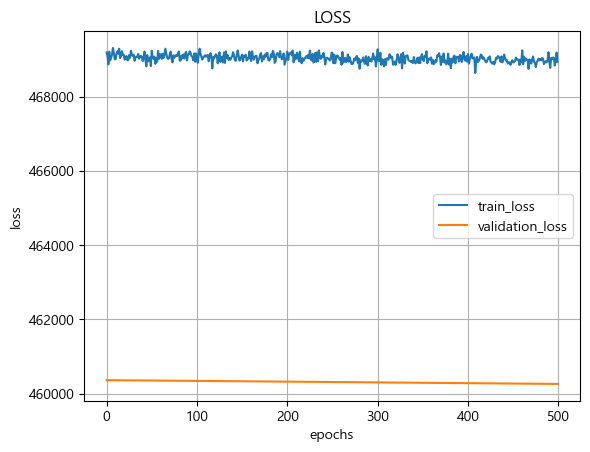

In [97]:
import matplotlib.pyplot as plt
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")

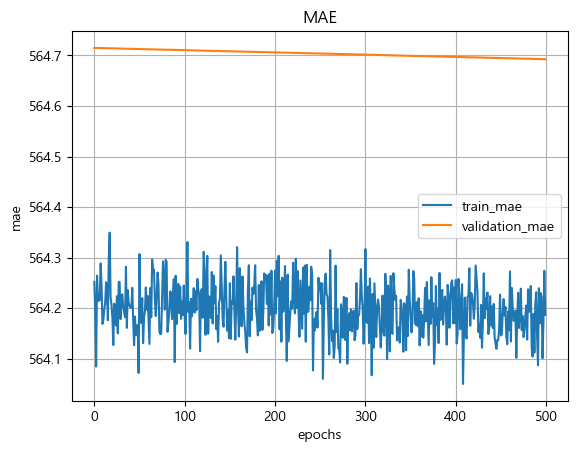

In [98]:
plt.title("MAE")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.grid()

plt.plot(result.history["mae"], label="train_mae")
plt.plot(result.history["val_mae"], label="validation_mae")
plt.legend(loc="best")